In [ ]:
# run python files
# !python /content/drive/MyDrive/Colab\ Notebooks/OCR/src/model_definition.py

In [62]:
import os
import random
import sys
from sklearn.model_selection import train_test_split
from importlib import reload
import cv2
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/OCR/src')

import utils
import model_definition
import model_train

reload(utils)
reload(model_definition)
reload(model_train)

<module 'model_train' from '/content/drive/MyDrive/Colab Notebooks/OCR/src/model_train.py'>

Get list of images

In [2]:
IMG_LIST_DIR = '/content/drive/MyDrive/Colab Notebooks/OCR/data/PageImg/'
SEG_LIST_DIR = '/content/drive/MyDrive/Colab Notebooks/OCR/data/PageSeg/'

image_list = os.listdir(IMG_LIST_DIR)
image_list = [filename.split(".")[0] for filename in image_list]

seg_list = os.listdir(SEG_LIST_DIR)
seg_list = [filename.split(".")[0] for filename in seg_list]

Split data into train and test

In [3]:
images = {} # dict with name of input images
seg_images = {} # dict with name of output images

images['train'], images['validation'], seg_images['train'], seg_images['validation'] = train_test_split(image_list, seg_list, test_size = 0.25, shuffle = True)

Import model

In [4]:
model = model_definition.UNet(input_size = (512, 512, 1))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

Train the model

In [ ]:
model = model_train.train_model(model, IMG_LIST_DIR, SEG_LIST_DIR, images, seg_images)

Epoch 1/3
56/56 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.6174
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/OCR/models/cp.ckpt
56/56 [==============================] - 125s 2s/step - loss: 0.6970 - accuracy: 0.6174 - val_loss: 0.6870 - val_accuracy: 0.6358
Epoch 2/3
56/56 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.6194
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/OCR/models/cp.ckpt
56/56 [==============================] - 83s 1s/step - loss: 0.6854 - accuracy: 0.6194 - val_loss: 0.6812 - val_accuracy: 0.6395
Epoch 3/3
56/56 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.6191
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/OCR/models/cp.ckpt
56/56 [==============================] - 81s 1s/step - loss: 0.6812 - accuracy: 0.6191 - val_loss: 0.6765 - val_accuracy: 0.6400


Load model

In [6]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/OCR/models/checkpoint_0.01lr_4batch')

Test the model in one image

1/1 [==============================] - 9s 9s/step


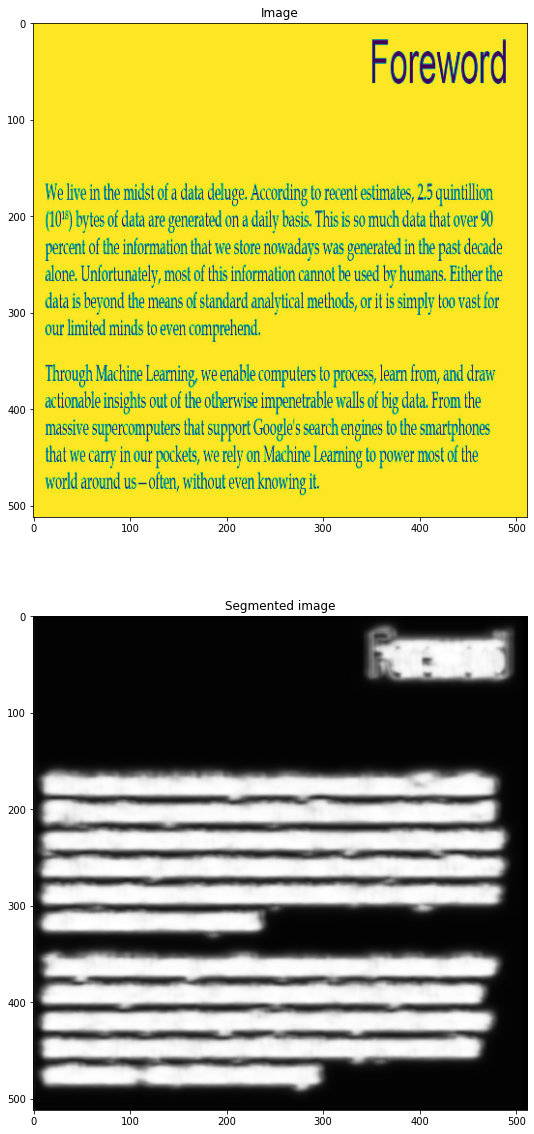

In [66]:
img_orig = cv2.imread(f'{IMG_LIST_DIR}3.JPG',0)
img = utils.img_preprocessing(img_orig)
img=np.expand_dims(img,axis=0)

pred=model.predict(img)

pred=np.squeeze(np.squeeze(pred,axis=0),axis=-1)

utils.show_img(cv2.resize(img_orig, (512, 512)), pred)

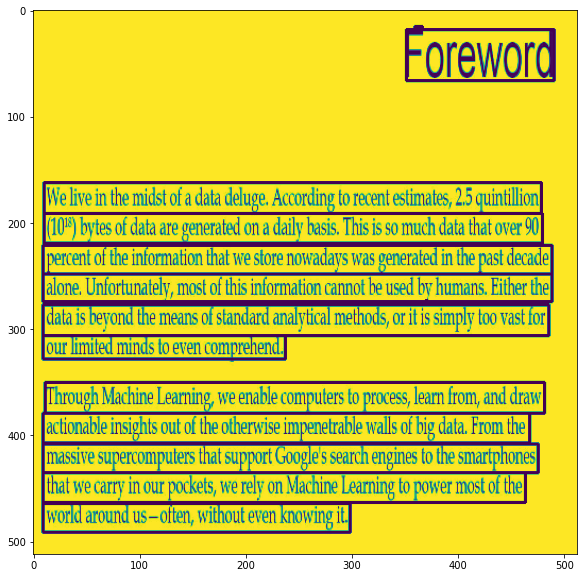

In [68]:
bound_boxes_img = utils.get_bounding_boxes(img_orig, pred)

plt.figure(figsize = (10, 10))
plt.imshow(bound_boxes_img)